In [1]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

from scipy import special

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
az.style.use("arviz-white")

In [4]:
length = [
    1.3, 1.32, 1.32, 1.4, 1.42, 1.42, 1.47, 1.47, 1.5, 1.52, 1.63, 1.65, 1.65, 1.65, 1.65,
    1.68, 1.7, 1.73, 1.78, 1.78, 1.8, 1.85, 1.93, 1.93, 1.98, 2.03, 2.03, 2.31, 2.36, 2.46,
    3.25, 3.28, 3.33, 3.56, 3.58, 3.66, 3.68, 3.71, 3.89, 1.24, 1.3, 1.45, 1.45, 1.55, 1.6, 
    1.6, 1.65, 1.78, 1.78, 1.8, 1.88, 2.16, 2.26, 2.31, 2.36, 2.39, 2.41, 2.44, 2.56, 2.67, 
    2.72, 2.79, 2.84
]
choice = [
    "I", "F", "F", "F", "I", "F", "I", "F", "I", "I", "I", "O", "O", "I", "F", "F", 
    "I", "O", "F", "O", "F", "F", "I", "F", "I", "F", "F", "F", "F", "F", "O", "O", 
    "F", "F", "F", "F", "O", "F", "F", "I", "I", "I", "O", "I", "I", "I", "F", "I", 
    "O", "I", "I", "F", "F", "F", "F", "F", "F", "F", "O", "F", "I", "F", "F"
]

sex = ["Male"] * 32 + ["Female"] * 31

data = pd.DataFrame({"choice": choice, "length": length, "sex": sex})

data["choice"]  = pd.Categorical(
    data["choice"].map({"I": "Invertebrates", "F": "Fish", "O": "Other"}), 
    ["Other", "Invertebrates", "Fish"], 
    ordered=True
)
data.head(3)

,choice,length,sex
0,Invertebrates,1.30,Male
1,Fish,1.32,Male
2,Fish,1.32,Male


In [5]:
model = bmb.Model("choice ~ length + sex", data, family="categorical")
idata = model.fit()

/home/tomas/anaconda3/envs/bambi/lib/python3.10/site-packages/aesara/tensor/nnet/basic.py:1116: FutureWarning: Softmax now accepts an axis argument. For backwards-compatibility it defaults to -1 when not specified, but in the future the default will be `None`.
To suppress this warning specify axis explicitly.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Intercept, length, sex]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 6 seconds.


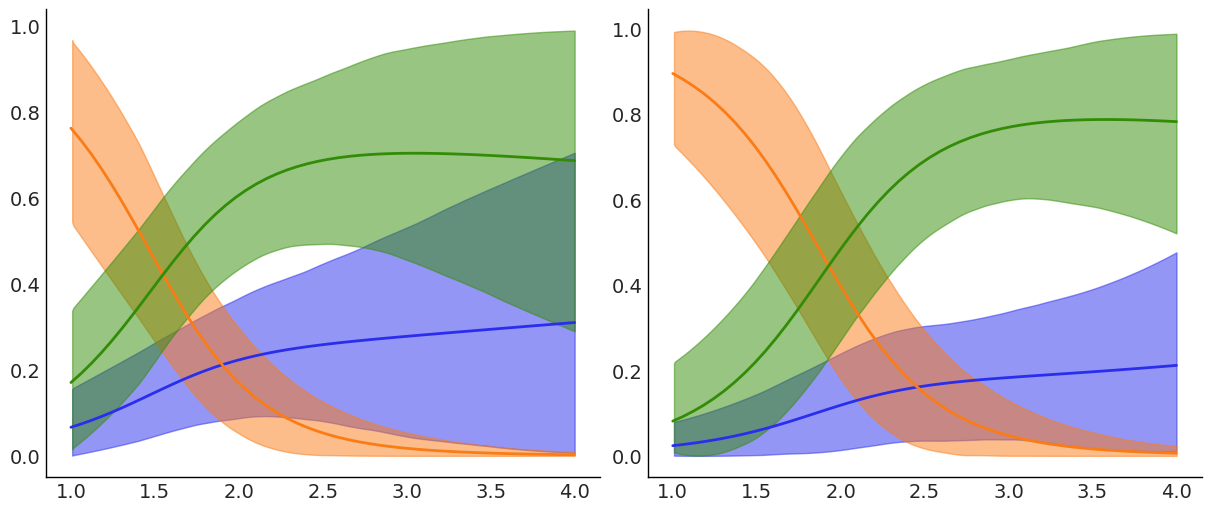

In [67]:
new_length = np.linspace(1, 4)
new_data = pd.DataFrame({"length": np.tile(new_length, 2), "sex": ["Male"] * 50 + ["Female"] * 50})
idata = model.predict(idata, data=new_data, inplace=False)
p = idata.posterior["choice_mean"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
choices = ["Other", "Invertebrates", "Fish"]

for j, choice in enumerate(choices):
   males = p.sel({"choice_mean_dim":choice, "choice_obs":slice(0, 49)})
   females = p.sel({"choice_mean_dim":choice, "choice_obs":slice(50, 100)})
   axes[0].plot(new_length, males.mean(("chain", "draw")), color=f"C{j}", lw=2)
   axes[1].plot(new_length, females.mean(("chain", "draw")), color=f"C{j}", lw=2)
   az.plot_hdi(new_length, males, color=f"C{j}", ax=axes[0])
   az.plot_hdi(new_length, females, color=f"C{j}", ax=axes[1])

In [68]:
idata_2 = model.predict(idata, data=new_data, inplace=False)

In [71]:
idata_2 = model.predict(idata, kind="pps", inplace=False)
idata_2

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> observed_data

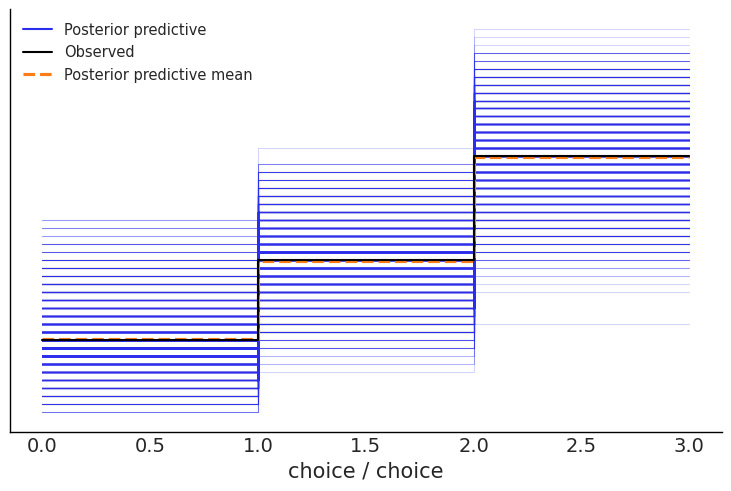

In [72]:
az.plot_ppc(idata_2);

In [ ]:
new_length = np.linspace(1, 4)
new_data = pd.DataFrame({"length": np.tile(new_length, 2), "sex": ["Male"] * 50 + ["Female"] * 50})

/tmp/ipykernel_31267/3346881239.py:13: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.05, right=0.975, bottom=0.075, top=0.85)


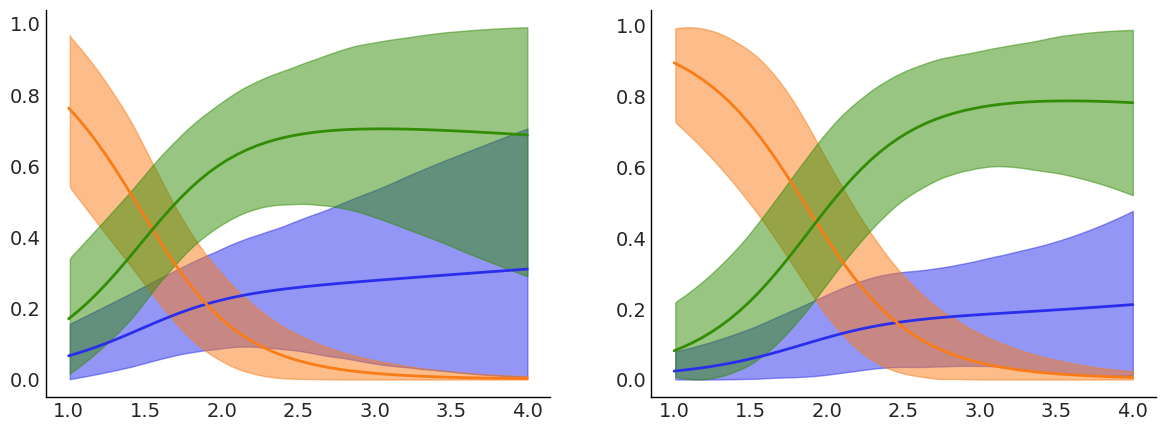

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
choices = ["Other", "Invertebrates", "Fish"]

p = idata.posterior["choice_mean"]

for j, choice in enumerate(choices):
   males = p.sel({"choice_mean_dim": choice, "choice_obs":slice(0, 49)})
   females = p.sel({"choice_mean_dim": choice, "choice_obs":slice(50, 100)})
   axes[0].plot(new_length, males.mean(("chain", "draw")), color=f"C{j}", lw=2)
   axes[1].plot(new_length, females.mean(("chain", "draw")), color=f"C{j}", lw=2)
   az.plot_hdi(new_length, males, color=f"C{j}", ax=axes[0])
   az.plot_hdi(new_length, females, color=f"C{j}", ax=axes[1])
fig.subplots_adjust(left=0.05, right=0.975, bottom=0.075, top=0.85)